<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Integrantes:**  
* César Quiroz Mansilla 201573578-6 cesar.quirozm@sansano.usm.cl
* Jorge Contreras Cabrera 201573547-6 jorge.contrerasc@sansano.usm.cl


> Antes de comenzar se importan las librerias usadas en la resolución del taller 0

In [1]:
#Importaciones librerias usadas.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##  2. Job Salary Prediction

> a) Carge los datos *csv* de entrenamiento y cree un conjunto de validación con los últimos 10 mil datos en un dataframe de *pandas*. Describa los datos, apóyese de gráficos ¿Cuántos datos hay en cada conjunto?  

In [17]:
df = pd.read_csv("Train_rev1.csv")
df_train = df.iloc[:-10000]  #todo el conjunto menos los ultimos 10k
df_val = df.iloc[-10000:]    #ultimos 10k valores del conjunto
df_train2 = df.iloc[-25000:-10000]

In [3]:
#Quitar filas que no estan normalizadas
# Conjunto validacion
del df_val['LocationRaw'] #Direccion en estado bruto
del df_val['SalaryRaw'] #salatio en estado bruto
del df_val['SourceName'] #Nombre de ka fuente innecesaria
del df_val['Title'] #todos tinen diferente valor

#Conjunto entrenamiento
del df_train['LocationRaw']
del df_train['SalaryRaw']
del df_train['SourceName']
del df_train['Title']

In [4]:
#Crear conjuntos de salarios.
largo_conjunto = 15000 #conjuntos de 15000 en 15000
c1=0
c2=0
c3=0
c4=0
c5=5
c6=0
c7=0
c8=0
c9=0
c10=0
for x in df_train.SalaryNormalized:
    if largo_conjunto >= x:
        c1=c1+1 
    elif(2*largo_conjunto) >= x:
        c2=c2+1
    elif (3*largo_conjunto) >= x:
        c3=c3+1
    elif(4*largo_conjunto) >= x:
        c4=c4+1
    elif (5*largo_conjunto) >= x:
        c5=c5+1
    elif (6*largo_conjunto) >= x:
        c6=c6+1
    elif (7*largo_conjunto) >= x:
        c7=c7+1
    elif (8*largo_conjunto) >= x:
        c8=c8+1
    elif (9*largo_conjunto)>=x:
        c9=c9+1
    else:
        c10=c10+1

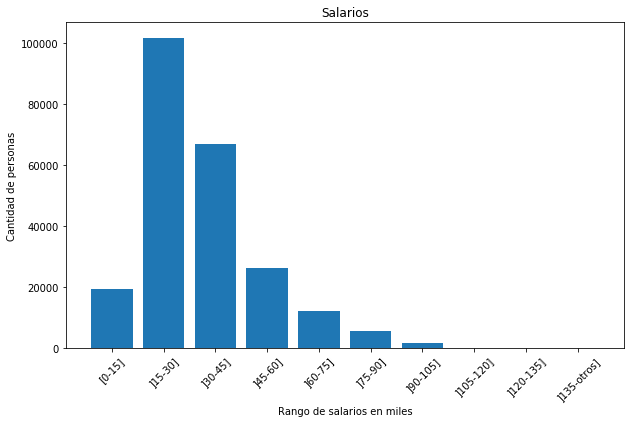

In [5]:
# Graficas

#Gráfico de barras de salarios por persona
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

eje_x=["[0-15]","]15-30]","]30-45]","]45-60]","]60-75]","]75-90]","]90-105]","]105-120]","]120-135]","]135-otros]"]
datos = [c1,c2,c3,c4,c5,c6,c7,c8,c9,c10]
X = np.arange(len(datos))
plt.figure(figsize=(10,6))
plt.bar(X, datos, align='center') #Widtth calibra grosor de las barras
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x,rotation = 45)
plt.title("Salarios") #titulo
plt.xlabel('Rango de salarios en miles') #Nombre eje x
plt.ylabel('Cantidad de personas') #Nombre eje y
plt.show()


Este gráfico informa cuantas personas ganan cierto rango de dinero (cada rango es de 15000 dolares), con ello encontramos que casi la
totaliad de la población gana entre 15000 y 45000 dolares.

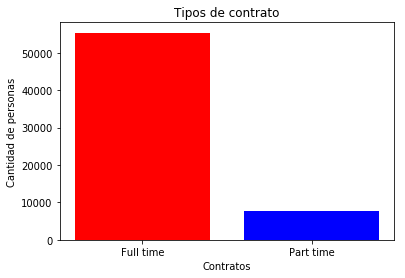

In [6]:
#Gráfico de barras de los tipos de contratos
eje_x=["Full time","Part time"]
X = np.arange(2)
plt.bar(X, df_train.ContractType.value_counts(), align='center',color=["r","b"])
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x)
plt.title("Tipos de contrato") #titulo
plt.xlabel('Contratos') #Nombre eje x
plt.ylabel('Cantidad de personas') #Nombre eje y
plt.show()


Encontramos 2 tipos de personas contratadas full time y part time, aunque se observa que existe una cantidad mucho mayor de trabajadores full time, con esta información no puede concluirse nada, ya que solo cerca de 60000 datos estan representados en el gráfico de un universo de 230000 por lo tanto esta información no es relevante.

Se elimina la columna con los tipos de contrato.

In [7]:
#eliminar columna 'ContractType'
del df_val['ContractType']
del df_train['ContractType']

<BarContainer object of 29 artists>

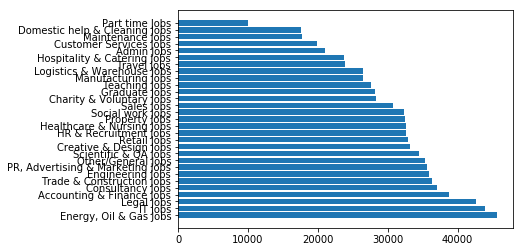

In [8]:
ct = df_val[pd.notnull(df_val['Category'])]
set1 = ct.Category.unique()
set1

jobs = df.groupby('Category', as_index=False)['SalaryNormalized'].mean()
jobs = jobs.sort_values('SalaryNormalized', ascending=False)

plt.barh(jobs.Category, jobs.SalaryNormalized)




In [9]:
#b
text = df.FullDescription
salary = df.SalaryNormalized

In [10]:
#c
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor1(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    text = re.sub('[/*]', '', text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

def word_extractor2(text):
    wordstemmer = PorterStemmer()
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    text = re.sub('[/*]', '', text)
    words = ""
    wordtokens = [ wordstemmer.stem(word.lower())for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
texts_train1 = [word_extractor1(t) for t in df_train2.FullDescription]
texts_val1 = [word_extractor1(t) for t in df_val.FullDescription]

vectorizer1 = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer1.fit(np.asarray(texts_train1))

features_train = vectorizer1.transform(texts_train1)
features_val = vectorizer1.transform(texts_val1)

labels_train = np.asarray(df_train2.SalaryNormalized.astype(float))
labels_val = np.asarray(df_val.SalaryNormalized.astype(float))

In [20]:
#d
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=False)
model.fit(features_train,labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
from sklearn.metrics import mean_absolute_error #measure MAE
print("MAE on train: ",mean_absolute_error(labels_train, model.predict(features_train)))
print("MAE on validation: ",mean_absolute_error(labels_val, model.predict(features_val)))

MAE on train:  28.319509029316073
MAE on validation:  23637.50687756283


In [ ]:
#e


## 3. Linear Regression by hand

> a) Escriba una función que calcule la función de pérdida, error cuadrático medio (MSE - *mean squared error*), para un dato o para un conjunto de datos.

La función de perdida ECM de define como:
$$
Loss = \frac{1}{N} \sum_i^N ( Y_i - \hat{Y}_i )^2
$$

Donde: 
* $Y$ es un vector de N valores verdaderos.
* $\hat{Y}$ es un vector con N prediciones.

In [47]:
y = [3,5,6] # vector de valoras verdaderos.
x= [4,6,6] # vector de predicioes.
datos = np.array([x,y])

def ecm (datos):
    resta=datos[0]-datos[1]
    cuadrado=resta**2
    loss=sum(cuadrado)/len(resta)
    return loss

perdida=ecm(datos)
print("Resultado fucion de perdida para un conjunto de datos: ",perdida)

Resultado fucion de perdida para un conjunto de datos:  0.6666666666666666


> b) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior, para un dato o para un conjunto de datos. *Escriba explícitamente la derivada (gradiente)*.

$$
f(x) = \frac{1}{N} ( x - \hat{Y} )^2
$$
$$
f(x)'=\frac{2}{N} ( x - \hat{Y} )
$$

In [48]:
i=0
derivadas=[]
def gradiente(datos):
    resta=datos[0]-datos[1]
    resultado=(resta*2)/len(resta)
    print("Vector con todas las derivadas",resultado)
    return sum(resultado)

resul=gradiente(datos)
print("Resulado: ",resul)


Vector con todas las derivadas [0.66666667 0.66666667 0.        ]
Resulado:  1.3333333333333333


> c) Escriba una función que calcule los parámetros de una regresión lineal simple de manera analítica (es decir el mínimo global). 

<div class="alert alert-warning"> Hint: ésto debería ser la ecuación desglosada de la derivada igual a 0, la cual incluye $(X^TX)^{-1}$</div>

* Regresión lineal simple:
$$
\hat{y} = f(\vec{x}) =\beta_0 +\beta_1\cdot \vec{x}
$$
